In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

pwd = os.getcwd()

In [2]:
total_slices = 17878347

times_combined = pd.DataFrame(
    {
        "files" : [],
        "server_nodes_fraction" : [],
        "server_rpc_xstreams_per_MPI_rank" : [],
        "total_num_nodes" : [],
        "MPI_rank_among_clients" : [],
        "expt_number" : [],
        "analysis_start_times" : [],
        "pep_start_times" : [],
        "pep_end_times" : [],
        "analysis_end_times" : [],
        "analysis_method" : [],
    }
)

df_ssd_hepnos = pd.read_csv("ssd_hepnos/servers_one_eigth/16MPI_ranks_per_node/ssd-hepnos.csv")
df_hepnos = pd.read_csv("hepnos/servers_one_eigth/16MPI_ranks_per_node/map-hepnos.csv")
times_hepnos = pd.concat([times_combined, df_ssd_hepnos, df_hepnos], ignore_index=True)
times_hepnos = times_hepnos.drop(columns=["Unnamed: 0"])
times_hepnos = times_hepnos.assign(throughput = ((total_slices * (times_hepnos["files"]/1929))/
                                                 (times_hepnos["pep_end_times"] - times_hepnos["pep_start_times"])))
times_hepnos = times_hepnos.assign(analysis_time = (times_hepnos["pep_end_times"] - times_hepnos["pep_start_times"]))
times_hepnos = times_hepnos.astype({'total_num_nodes':'int'})
times_hepnos = times_hepnos.astype({'files':'int'})
#times_hepnos = times_hepnos.assign(is_hepnos = int(1))

df_root = pd.read_csv("root/root-hepnos.csv")
df_root = df_root.assign(throughput = ((total_slices * (df_root["files"]/1929))/
                                                 (df_root["analysis_end_times"])))
df_root = df_root.drop(columns=["Unnamed: 0"])
# analysis start time for root is 0!
df_root = df_root.assign(analysis_time = (df_root["analysis_end_times"]))

#df_root = df_root.assign(is_hepnos = int(0))

df_root = df_root.astype({'total_num_nodes':'int'})
times_combined = pd.concat([times_combined, df_root, times_hepnos], ignore_index=True)
times_combined = times_combined.astype({'total_num_nodes':'int'})
times_combined = times_combined.astype({'files':'int'})

os.chdir(pwd)

In [3]:
times_combined[(times_combined["total_num_nodes"] == 256) &
               (times_combined["files"] == 1929) &
               (
                   (times_combined["MPI_rank_among_clients"] == 0) | 
                   (times_combined["MPI_rank_among_clients"].isna())
               )
              ]

,files,server_nodes_fraction,server_rpc_xstreams_per_MPI_rank,total_num_nodes,MPI_rank_among_clients,expt_number,analysis_start_times,pep_start_times,pep_end_times,analysis_end_times,analysis_method,throughput,analysis_time
18376,1929,0.125,16.0,256,0.0,1.0,0.000471,3.13705,62.2970,69.8127,HEPnOS-rocksdb,302203.551558,59.15995
23155,1929,0.125,16.0,256,0.0,2.0,0.000464,3.20944,62.6614,72.8086,HEPnOS-rocksdb,300719.219350,59.45196
25238,1929,0.125,16.0,256,0.0,3.0,0.000476,3.12125,62.9212,68.7432,HEPnOS-rocksdb,298969.263352,59.79995
29957,1929,0.125,16.0,256,0.0,4.0,0.000471,3.09963,63.5156,68.8330,HEPnOS-rocksdb,295920.879860,60.41597
32449,1929,0.125,16.0,256,0.0,5.0,0.000452,3.12009,61.9480,68.9257,HEPnOS-rocksdb,303909.266877,58.82791
92930,1929,0.125,16.0,256,0.0,1.0,0.000492,2.71234,61.6843,69.3709,HEPnOS-map,303166.911868,58.97196
98567,1929,0.125,16.0,256,0.0,2.0,0.000478,3.19776,62.1217,69.0079,HEPnOS-map,303413.977409,58.92394
102267,1929,0.125,16.0,256,0.0,3.0,0.000480,3.35960,63.1755,69.5032,HEPnOS-map,298889.542747,59.81590
104880,1929,0.125,16.0,256,0.0,4.0,0.000479,3.37822,63.0542,69.9692,HEPnOS-map,299590.337687,59.67598
106709,1929,0.125,16.0,256,0.0,5.0,0.000431,3.52398,61.7959,70.4134,HEPnOS-map,306808.957041,58.27192


In [4]:
times_combined_7716 = times_combined[ (times_combined["files"] == 7716)]

In [5]:
# Import seaborn
import seaborn as sns
import seaborn.objects as so

# Apply the default theme
sns.set_theme(palette='pastel')

In [6]:
time_avg_7716_8_node_root =  times_combined[(times_combined["files"] == 7716) &
                                            (times_combined["analysis_method"] == "ROOT") &
                                            (times_combined["total_num_nodes"] == 8)
                                            ]["analysis_time"].mean()

time_avg_7716_8_node_hepnos_map =  times_combined[(times_combined["files"] == 7716) &
                                                  (times_combined["analysis_method"] == "HEPnOS-map") &
                                                  (times_combined["total_num_nodes"] == 8)
                                                  ]["analysis_time"].mean()

time_avg_7716_16_node_hepnos_rocksdb =  times_combined[(times_combined["files"] == 7716) &
                                                       (times_combined["analysis_method"] == "HEPnOS-rocksdb") &
                                                       (times_combined["total_num_nodes"] == 16)
                                                      ]["analysis_time"].mean()

In [7]:
temp_root = times_combined_7716[ (times_combined_7716["analysis_method"] == "ROOT" )]
temp_root = temp_root.replace('ROOT', 'ROOT-ideal')
temp_hepnos_map = times_combined_7716[ (times_combined_7716["analysis_method"] == "HEPnOS-map" )]
temp_hepnos_map = temp_hepnos_map.replace('HEPnOS-map', 'HEPnOS-map-ideal')
temp_hepnos_rocksdb = times_combined_7716[ (times_combined_7716["analysis_method"] == "HEPnOS-rocksdb" )]
temp_hepnos_rocksdb = temp_hepnos_rocksdb.replace('HEPnOS-rocksdb', 'HEPnOS-rocksdb-ideal')

times_ideal_7716 = pd.concat([temp_root, temp_hepnos_map, temp_hepnos_rocksdb])#,ignore_index=True)

In [8]:
times_ideal_7716.shape

(59494, 13)

In [9]:
from tqdm import tqdm
for row in tqdm(range(times_ideal_7716.shape[0])):
    num_nodes = times_ideal_7716.iloc[row]["total_num_nodes"]
    if times_ideal_7716.iloc[row]['analysis_method'] == "ROOT-ideal":
        times_ideal_7716.at[row, 'analysis_time'] = 8*time_avg_7716_8_node_root/num_nodes 
    if times_ideal_7716.iloc[row]['analysis_method'] == "HEPnOS-map-ideal":
        times_ideal_7716.at[row, 'analysis_time'] = 8*time_avg_7716_8_node_hepnos_map/num_nodes
    if times_ideal_7716.iloc[row]['analysis_method'] == "HEPnOS-rocksdb-ideal":
        times_ideal_7716.at[row, 'analysis_time'] = 16*time_avg_7716_16_node_hepnos_rocksdb/num_nodes

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59494/59494 [02:52<00:00, 345.07it/s]


In [10]:
times_ideal_7716[(times_ideal_7716["total_num_nodes"] == 256) &
               (
                   (times_ideal_7716["MPI_rank_among_clients"] == 0) | 
                   (times_ideal_7716["MPI_rank_among_clients"].isna())
               )
              ]

,files,server_nodes_fraction,server_rpc_xstreams_per_MPI_rank,total_num_nodes,MPI_rank_among_clients,expt_number,analysis_start_times,pep_start_times,pep_end_times,analysis_end_times,analysis_method,throughput,analysis_time
65,7716.0,NaN,NaN,256.0,NaN,1.0,NaN,NaN,NaN,126.000,ROOT-ideal,567566.571429,780.960207
66,7716.0,NaN,NaN,256.0,NaN,2.0,NaN,NaN,NaN,124.000,ROOT-ideal,576720.870968,780.960207
67,7716.0,NaN,NaN,256.0,NaN,3.0,NaN,NaN,NaN,137.000,ROOT-ideal,521995.532847,780.960207
68,7716.0,NaN,NaN,256.0,NaN,4.0,NaN,NaN,NaN,119.000,ROOT-ideal,600952.840336,780.960207
163968,7716.0,0.125,16.0,256.0,0.0,1.0,0.000475,3.29398,92.2620,101.514,HEPnOS-map-ideal,803810.043204,88.968020
167161,7716.0,0.125,16.0,256.0,0.0,2.0,0.000468,3.33575,100.5280,104.564,HEPnOS-map-ideal,735793.111076,97.192250
171347,7716.0,0.125,16.0,256.0,0.0,3.0,0.000473,3.29428,93.0983,101.886,HEPnOS-map-ideal,796327.246820,89.804020
174290,7716.0,0.125,16.0,256.0,0.0,4.0,0.000474,3.59699,99.4010,107.265,HEPnOS-map-ideal,746455.059658,95.804010
179556,7716.0,0.125,16.0,256.0,0.0,5.0,0.000492,3.30764,94.1916,102.947,HEPnOS-map-ideal,786864.788902,90.883960
55688,7716.0,0.125,16.0,256.0,0.0,1.0,0.000461,3.12000,101.6720,111.021,HEPnOS-rocksdb-ideal,725641.164056,25.898447


In [11]:
times_ideal_7716.shape

(109941, 13)

In [12]:
times_ideal_7716 = times_ideal_7716[times_ideal_7716['analysis_method'].notna()]

In [13]:
times_ideal_7716

,files,server_nodes_fraction,server_rpc_xstreams_per_MPI_rank,total_num_nodes,MPI_rank_among_clients,expt_number,analysis_start_times,pep_start_times,pep_end_times,analysis_end_times,analysis_method,throughput,analysis_time
47,7716.0,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,1260.000,ROOT-ideal,56756.657143,780.960207
48,7716.0,NaN,NaN,16.0,NaN,1.0,NaN,NaN,NaN,686.000,ROOT-ideal,104246.921283,780.960207
49,7716.0,NaN,NaN,16.0,NaN,2.0,NaN,NaN,NaN,685.000,ROOT-ideal,104399.106569,780.960207
50,7716.0,NaN,NaN,16.0,NaN,3.0,NaN,NaN,NaN,690.000,ROOT-ideal,103642.591304,780.960207
51,7716.0,NaN,NaN,16.0,NaN,4.0,NaN,NaN,NaN,686.000,ROOT-ideal,104246.921283,780.960207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75104,7716.0,0.125,16.0,128.0,1128.0,4.0,0.000462,2.42509,104.5610,110.059,HEPnOS-rocksdb-ideal,700178.693273,102.135910
75105,7716.0,0.125,16.0,128.0,344.0,4.0,0.000443,2.44636,101.0300,110.040,HEPnOS-rocksdb-ideal,725408.272610,98.583640
75106,7716.0,0.125,16.0,128.0,1046.0,4.0,0.000461,2.44121,104.3970,110.039,HEPnOS-rocksdb-ideal,701415.662612,101.955790
75107,7716.0,0.125,16.0,128.0,827.0,4.0,0.000457,2.44397,102.3550,110.035,HEPnOS-rocksdb-ideal,715770.701193,99.911030


In [14]:
times_ideal_7716 = times_ideal_7716.assign(ideal_scaling = int(1))
times_combined_7716 = times_combined_7716.assign(ideal_scaling = int(0))

In [15]:
df_to_plot_7716 = pd.concat([times_combined_7716, times_ideal_7716], ignore_index=True)
df_to_plot_7716 = df_to_plot_7716.rename(columns={"analysis_method": "analysis method"})

In [16]:
df_to_plot_7716

,files,server_nodes_fraction,server_rpc_xstreams_per_MPI_rank,total_num_nodes,MPI_rank_among_clients,expt_number,analysis_start_times,pep_start_times,pep_end_times,analysis_end_times,analysis method,throughput,analysis_time,ideal_scaling
0,7716.0,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,1260.000,ROOT,56756.657143,1260.00000,0
1,7716.0,NaN,NaN,16.0,NaN,1.0,NaN,NaN,NaN,686.000,ROOT,104246.921283,686.00000,0
2,7716.0,NaN,NaN,16.0,NaN,2.0,NaN,NaN,NaN,685.000,ROOT,104399.106569,685.00000,0
3,7716.0,NaN,NaN,16.0,NaN,3.0,NaN,NaN,NaN,690.000,ROOT,103642.591304,690.00000,0
4,7716.0,NaN,NaN,16.0,NaN,4.0,NaN,NaN,NaN,686.000,ROOT,104246.921283,686.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118983,7716.0,0.125,16.0,128.0,1128.0,4.0,0.000462,2.42509,104.5610,110.059,HEPnOS-rocksdb-ideal,700178.693273,102.13591,1
118984,7716.0,0.125,16.0,128.0,344.0,4.0,0.000443,2.44636,101.0300,110.040,HEPnOS-rocksdb-ideal,725408.272610,98.58364,1
118985,7716.0,0.125,16.0,128.0,1046.0,4.0,0.000461,2.44121,104.3970,110.039,HEPnOS-rocksdb-ideal,701415.662612,101.95579,1
118986,7716.0,0.125,16.0,128.0,827.0,4.0,0.000457,2.44397,102.3550,110.035,HEPnOS-rocksdb-ideal,715770.701193,99.91103,1


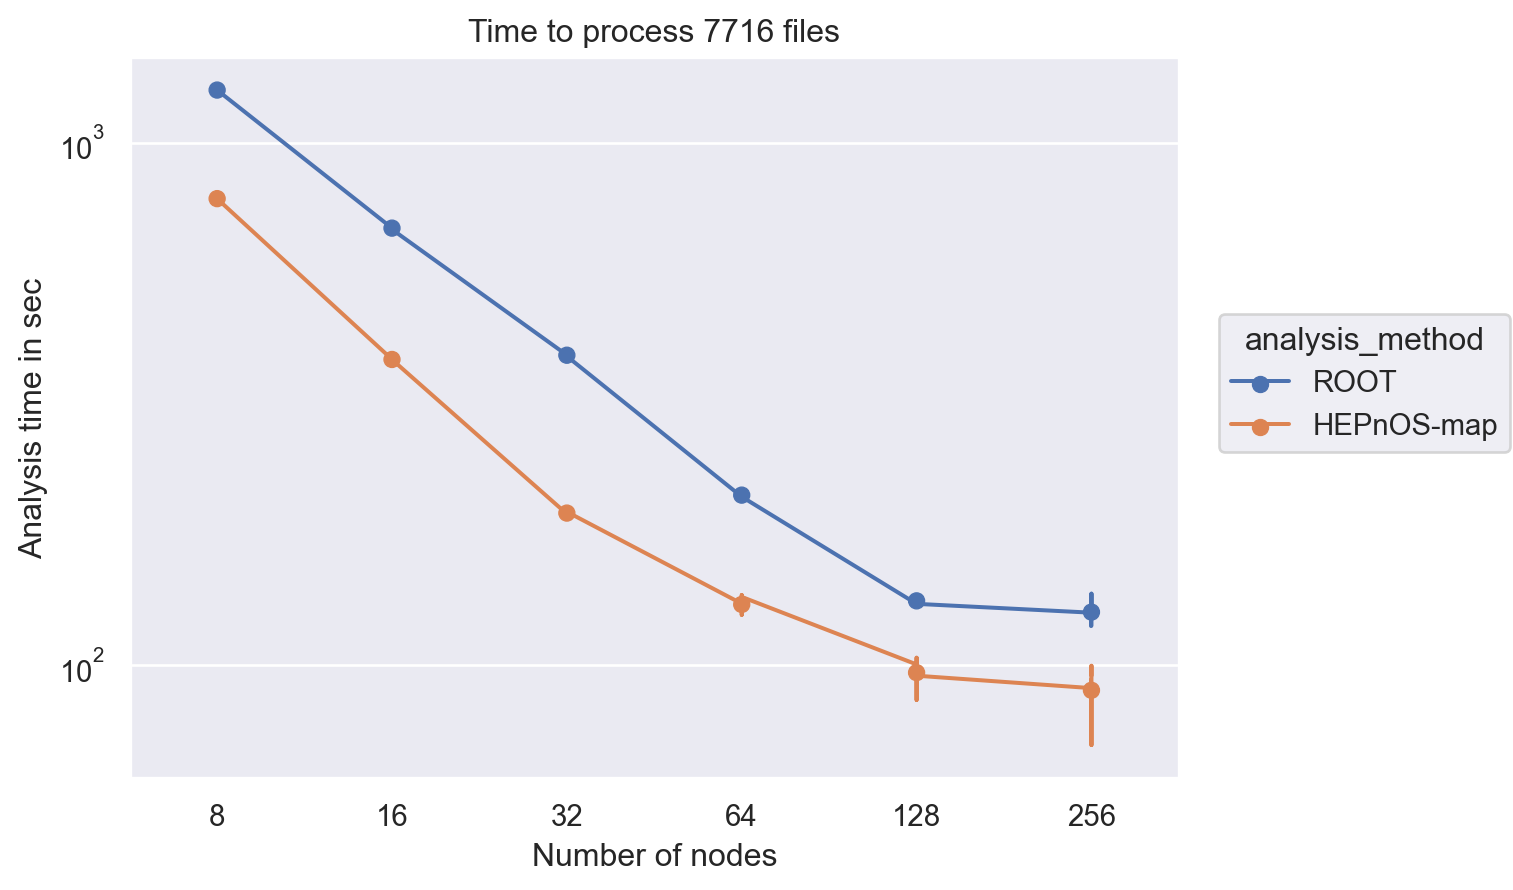

In [23]:
p = (
so.Plot(times_combined_7716[(times_combined_7716["analysis_method"]!="HEPnOS-rocksdb")],
    x="total_num_nodes",
    y="analysis_time",
    color="analysis_method"
    #linestyle="ideal_scaling"
    )
    .scale(y="log")
    .scale(x="log")
    .scale(x=so.Nominal())
    .add(so.Line())
    .add(so.Dot(), so.Est())
    .add(so.Range(), so.Est(errorbar="sd"))
    .label(x="Number of nodes", y="Analysis time in sec", title="Time to process 7716 files")
)
p.save("7716_scaling.png", dpi=250)